# 0. Set up

In [2]:
import json
import numpy as np
import pandas as pd
import qgrid
import ipywidgets as widgets
import matplotlib.pyplot as plt
from exp_tracker.module_1 import *
from exp_tracker.module_2 import *
from exp_tracker.module_3 import *

# 1. Create or import project

<font color=blue size=4>In this module, we can open the project by either creating or importing one.

In [3]:
choice = choice_1()
display(choice)

Create or import project?


RadioButtons(description='Choose:', options=('Create new project', 'Import existing project'), value='Create n…

In [21]:
project_choice = project_widget(choice)
display(project_choice)

Please enter the name of the new project: 


Text(value='', description='Project: ')

In [5]:
project_name = project_name_validation(choice, project_choice)

The project you choose is: my_exp_2021


# 2. Basic operation

<font color=blue size=4>In this module, we can do some basic operations with our project.

## 2.1 Display the transactions

In [16]:
display_transaction(project_name)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## 2.2 Add a transaction

In [7]:
date = date_widget()
display(date)

Please pick the date of the transaction: 


DatePicker(value=None, description='Date:')

In [8]:
amount = amount_widget(date)
display(amount)

The date is: 2021-05-20
Please enter the amount of the transaction: 


BoundedFloatText(value=0.0, description='Amount:', max=1000000.0, step=0.01)

In [9]:
category = category_widget(amount)
display(category)

The amount is: 89.0
Please choose the category of the transaction: 


Dropdown(description='Category:', options=('Home & Utilities', 'Transportation', 'Groceries', 'Restaurants & D…

In [10]:
account = account_widget(category)
display(account)

The category is: Groceries
Please choose the account of the transaction: 


Dropdown(description='Account:', options=('Cash', 'Debit Card', 'Credit Card'), value='Cash')

In [11]:
description = description_widget(account)
display(description)

The account is: Credit Card
Please enter the description of the transaction: 


Text(value='', description='Description:')

In [12]:
id = set_id(description, project_name)

The description is: test
The id is: 95


In [13]:
check_add = confirm_add(id, date, amount, category, account, description, project_name)
display(check_add)


The transaction to add: 


id                      95
Date            2021-05-20
Amount                89.0
Category         Groceries
Account        Credit Card
Description           test
dtype: object

Do you want to add the transaction? 


Checkbox(value=False, description='Yes, add', indent=False)

In [14]:
add_transaction(id, date, amount, category, account, description, project_name, check_add)

The transaction is added


## 2.3 Update the transaction

In [8]:
id = get_id_to_update(project_name)
display(id)

Please enter the id of the transaction you want to update:


Combobox(value='', description='id:', ensure_option=True, options=('0', '1', '2', '3', '4', '5', '6', '7', '8'…

In [9]:
id.value
date = date_widget()
display(date)

Please pick the date of the transaction: 


DatePicker(value=None, description='Date:')

In [10]:
amount = amount_widget(date)
display(amount)

The date is: 2021-07-10
Please enter the amount of the transaction: 


BoundedFloatText(value=0.0, description='Amount:', max=1000000.0, step=0.01)

In [11]:
category = category_widget(amount)
display(category)

The amount is: 67.0
Please choose the category of the transaction: 


Dropdown(description='Category:', options=('Home & Utilities', 'Transportation', 'Groceries', 'Restaurants & D…

In [12]:
account = account_widget(category)
display(account)

The category is: Home & Utilities
Please choose the account of the transaction: 


Dropdown(description='Account:', options=('Cash', 'Debit Card', 'Credit Card'), value='Cash')

In [13]:
description = description_widget(account)
display(description)

The account is: Credit Card
Please enter the description of the transaction: 


Text(value='', description='Description:')

In [14]:
check_update = confirm_update(int(id.value), date.value, amount.value, str(category.value),str(account.value),str(description.value), project_name)
display(check_update)

The original transaction information: 


id                                   94
Date                2021-04-27 00:00:00
Amount                            49.85
Category       Shopping & Entertainment
Description                 WALMART.COM
Account                     Credit Card
Name: 94, dtype: object


The updated transaction information: 


id                           94
Date                 2021-07-10
Amount                     67.0
Category       Home & Utilities
Account             Credit Card
Description                    
dtype: object

Do you want to update the transaction? 


Checkbox(value=False, description='Yes, update', indent=False)

In [15]:
update_transaction(int(id.value), date.value, amount.value, str(category.value),str(account.value),str(description.value), project_name, check_update)

The transaction is updated


## 2.4 Delete a transaction

In [25]:
id = get_id_to_delete(project_name)
display(id)

Please enter the id of the transaction that you want to delete:


Combobox(value='', description='id:', ensure_option=True, options=('0', '1', '2', '3', '4', '5', '6', '7', '8'…

In [26]:
delete_checker = confirm_delete(int(id.value),  project_name)
display(delete_checker)

The  transaction information: 


id                                   95
Date                2021-05-20 00:00:00
Amount                             70.0
Category       Shopping & Entertainment
Description                            
Account                            Cash
Name: 95, dtype: object

Do you want to delete the transaction? 


Checkbox(value=False, description='Yes, delete', indent=False)

In [27]:
delete_transaction(int(id.value), project_name, delete_checker)

The transaction is deleted


# 3. Analyze

<font color=blue size=4>In this module, we can do some analysis by plotting the expenses data.

## 3.1 Select the data to analyze

In [17]:
# Filter to select the data for analyzing
qgrid_widget = display_transaction(project_name)
display(qgrid_widget)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [18]:
# Capture the filtered dataframe
df = qgrid_widget.get_changed_df()

## 3.2 Monthly expenses bar chart

Total expenses by month:

  Year_month   Amount
0    2021-03  1739.19


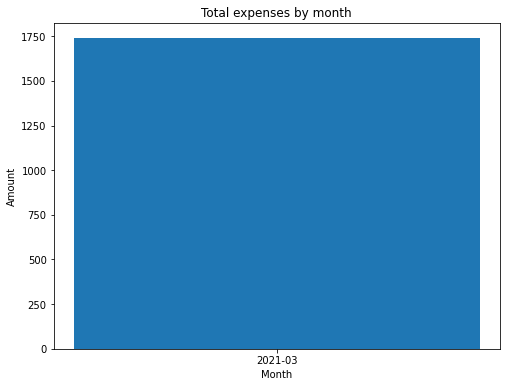

<Figure size 432x288 with 0 Axes>

In [19]:
# Draw the bar chart with the filtered dataframe
draw_bar_chart(df)

## 3.3 Pie chart by category

Total expenses by category:

                   Category  Amount
0                 Education   19.99
1                 Groceries  447.49
2                    Health    0.00
3          Home & Utilities  890.00
4                    Others   15.00
5      Restaurants & Dining  127.44
6  Shopping & Entertainment   93.23
7            Transportation  146.04


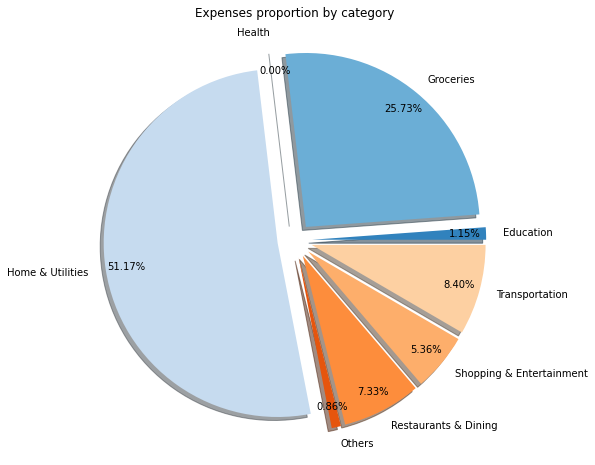

<Figure size 432x288 with 0 Axes>

In [20]:
# Draw the pie chart with the filtered dataframe
draw_pie_chart(df)